In [ ]:
#My dataset is available in googledrive; so I am accessing my drive from colab
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
#Once this is executed, you will see your drive appearing on the left hand side

Mounted at /content/drive


In [ ]:
# Define paths to the dataset
train_dir = '/content/drive/MyDrive/COVID-19 Chest X-ray Image Dataset/train'
test_dir = '/content/drive/MyDrive/COVID-19 Chest X-ray Image Dataset/test'

In [ ]:
import os
print(len(os.listdir('/content/drive/MyDrive/COVID-19 Chest X-ray Image Dataset/train/covid')))
print(len(os.listdir('/content/drive/MyDrive/COVID-19 Chest X-ray Image Dataset/train/normal')))
print(len(os.listdir('/content/drive/MyDrive/COVID-19 Chest X-ray Image Dataset/test/covid')))
print(len(os.listdir('/content/drive/MyDrive/COVID-19 Chest X-ray Image Dataset/test/normal')))

200
200
100
100


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create ImageDataGenerator for training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Split 20% of the images for validation
)

# Load and prepare training data
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',  # 'binary' for binary classification
    subset='training'  # Specify 'training' for the training set
)

# Create ImageDataGenerator for validation set
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Note: Using the same validation split as in the training set
)

# Load and prepare validation data
validation_data = validation_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',
    subset='validation'  # Specify 'validation' for the validation set
)

Found 320 images belonging to 2 classes.
Found 80 images belonging to 2 classes.


In [ ]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,UpSampling2D, Dropout

In [ ]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))  # 32 filters
#model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
#model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
#model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu')) #feature reduction
#model.add(Dropout(0.1))  # added to reduce overfitting
model.add(Dense(64,activation='relu'))
#model.add(Dropout(0.1))  # added to reduce overfitting
model.add(Dense(1,activation='sigmoid'))  #output layer

In [ ]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy']) #binary_crossentropy - binary classification

In [ ]:
history = model.fit(train_data, epochs=10, validation_data=validation_data)

NameError: name 'model' is not defined

In [ ]:
model.save('my_model_covid.keras')

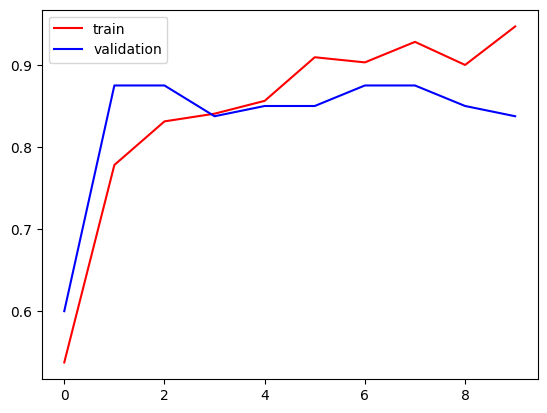

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

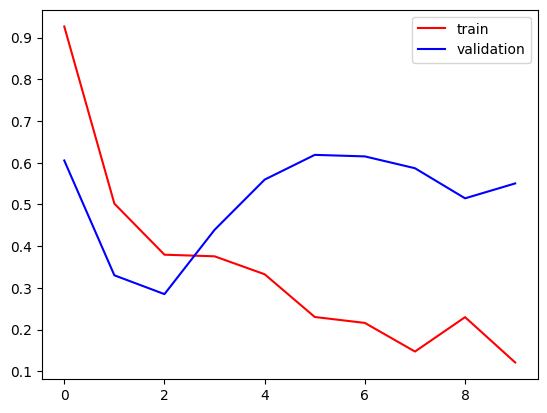

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
model.evaluate(train_data)

10/10 [==============================] - 24s 2s/step - loss: 0.0741 - accuracy: 0.9594


[0.074065200984478, 0.9593750238418579]

In [ ]:
model.evaluate(validation_data)

3/3 [==============================] - 4s 850ms/step - loss: 0.5503 - accuracy: 0.8375


[0.5502685904502869, 0.8374999761581421]

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)

Found 200 images belonging to 2 classes.


In [ ]:
#predict the test data
predictions = model.predict(test_data)
print(predictions)

7/7 [==============================] - 21s 3s/step
[[5.41164633e-03]
 [9.99995530e-01]
 [3.91854439e-03]
 [7.06387172e-03]
 [1.00000000e+00]
 [9.99998748e-01]
 [5.13943061e-02]
 [1.00000000e+00]
 [3.86105967e-03]
 [9.99985218e-01]
 [9.22538340e-01]
 [9.99995649e-01]
 [9.95816112e-01]
 [7.64751613e-01]
 [7.59548068e-01]
 [9.46871069e-07]
 [1.00000000e+00]
 [9.99999285e-01]
 [1.00000000e+00]
 [9.78386760e-01]
 [5.29552635e-04]
 [9.99890566e-01]
 [9.99986887e-01]
 [4.89322469e-02]
 [9.99998391e-01]
 [9.99436915e-01]
 [9.99991000e-01]
 [9.99992549e-01]
 [1.00000000e+00]
 [3.65781671e-05]
 [1.00000000e+00]
 [1.00000000e+00]
 [7.48617388e-03]
 [1.00000000e+00]
 [9.99999940e-01]
 [9.64487970e-01]
 [8.52881745e-03]
 [1.60420358e-01]
 [2.41368853e-05]
 [2.27495894e-01]
 [2.25107614e-02]
 [4.98074223e-06]
 [1.00000000e+00]
 [9.99992669e-01]
 [2.36596212e-01]
 [2.82389462e-01]
 [1.73839796e-02]
 [9.99865174e-01]
 [9.99999881e-01]
 [3.73273678e-02]
 [2.69427896e-02]
 [9.99996126e-01]
 [1.81490824e

In [ ]:
len(predictions)

200

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have ground truth labels (true_labels) and predicted labels (predictions)
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)  # Adjust the threshold as needed

#Define class labels
class_labels = ['Covid', 'Normal']

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("Classification Report:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[48 52]
 [49 51]]
Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.48      0.49       100
           1       0.50      0.51      0.50       100

    accuracy                           0.49       200
   macro avg       0.49      0.49      0.49       200
weighted avg       0.49      0.49      0.49       200



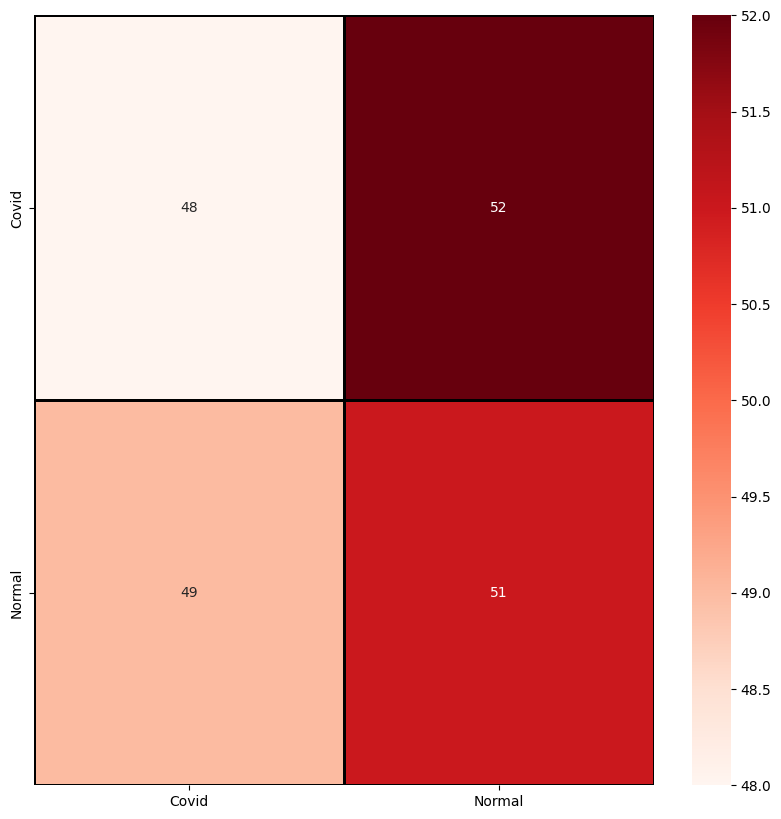

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(cm, cmap='Reds', linecolor='black', linewidth=1, annot=True, fmt='', xticklabels=class_labels, yticklabels=class_labels)
plt.show()